### Кластеризация KMeans

In [1]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [2]:
# импорт бибилиотек
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # библиотека для кластеризации

In [3]:
# load data
df = pd.read_csv('data/pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

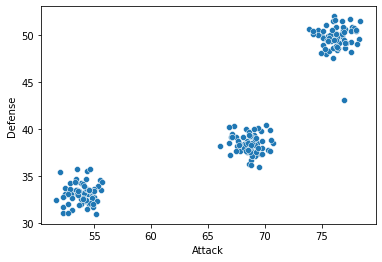

In [4]:
# произведем кластеризацию покемонов по уровню атаки и защиты
X = df[['Attack', 'Defense']]

# визуализируем через точечную диаграмму по двум признакам
sns.scatterplot(x=X.Attack, y=X.Defense)

Произведем кластеризацию с количеством 3 кластера

<Axes: xlabel='Attack', ylabel='Defense'>

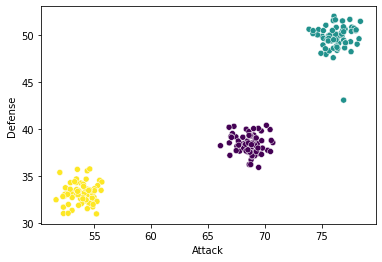

In [5]:
# инициализация алгоритма KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42) # для 3 кластеров

# обучим модель через fit
kmeans.fit(X)

# произведем предсказание кластеризации
predict = kmeans.predict(X)

# получим метки данных, на которых обучалась модель
predict = kmeans.labels_
# сохраним предсказание в датафрейм
df['Clusters_k3'] = predict

# визуализируем кластеризацию на 3 кластера
sns.scatterplot(x=df.Attack, y=df.Defense, c=predict) #наблюдаем справа выброс

# параметр "с" принимает вектор с номерами классов для группировки объектов по цветам и подкрашивает кластеры

Производим кластеризацию на 4 кластера

KMeans плохо работает с выбросами, и не смог выброс определить в отдельный кластер


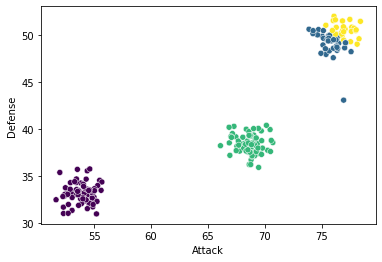

In [14]:
# инициализация алгоритма KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42) # для 4 кластеров

# обучим модель через fit
kmeans.fit(X)

# произведем предсказание кластеризации
predict = kmeans.predict(X)

# получим метки данных, на которых обучалась модель
predict = kmeans.labels_
# сохраним предсказание в датафрейм
df['Clusters_k3'] = predict

# визуализируем кластеризацию на 3 кластера
sns.scatterplot(x=df.Attack, y=df.Defense, c=predict) #наблюдаем справа выброс

print('KMeans плохо работает с выбросами, и не смог выброс определить в отдельный кластер')

# параметр "с" принимает вектор с номерами классов для группировки объектов по цветам и подкрашивает кластеры

Добавляем третий признак $Speed$

In [23]:
# произведем кластеризацию покемонов по уровню атаки и защиты
X = df[['Attack', 'Defense', 'Speed']]

# инициализация алгоритма KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42) # для 3 кластеров

# обучим модель через fit
kmeans.fit(X)

# произведем предсказание кластеризации
predict = kmeans.predict(X)

# получим метки данных, на которых обучалась модель
predict = kmeans.labels_

print(predict)

[0 2 2 2 2 2 1 1 1 0 2 2 2 2 0 0 2 1 2 1 1 1 2 2 2 2 1 1 1 0 0 2 0 2 0 2 0
 2 2 2 1 2 2 1 1 2 2 2 2 2 1 0 2 2 2 2 1 0 2 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2
 0 2 1 1 1 2 1 1 1 0 2 2 0 0 2 0 0 2 0 2 2 1 2 0 2 2 2 1 2 2 0 0 0 0 0 2 2
 2 2 2 0 0 2 2 2 1 1 0 0 2 2 1 0 0 2 2 1 1 1 0 1 0 0 0 2 1 0 0 2 0 0 1 1 1
 2 1 1 1 2 1 0 2 2 0 2 2 1 2 1 2 1 2 2 2 2 1 0 1 1 0 2 2 0 2 1 0 0 0 2 0 0
 2 1 1 1 0 2 2 2 1 2 1 1 1 1 2 1 2 2 0 2 2]


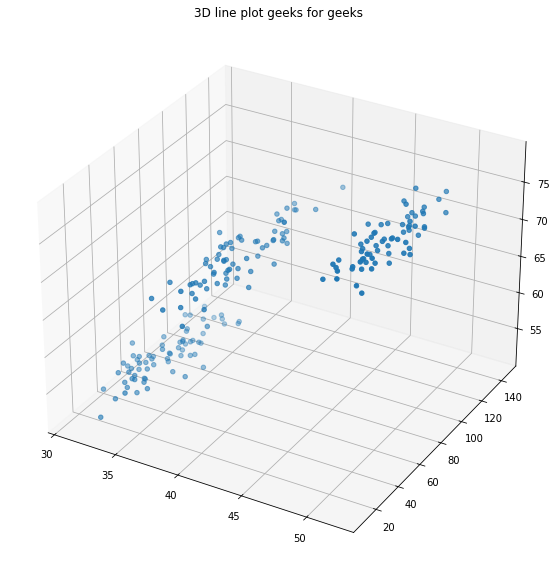

In [21]:
import numpy as np
import matplotlib.pyplot as plt
 
 
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# defining all 3 axis
z = df.Attack
x = df.Defense
y = df.Speed
 
# plotting
ax.scatter3D(x, y, z)
ax.set_title('3D line plot geeks for geeks')
plt.show()